<a href="https://colab.research.google.com/github/andrewwatkinson/Projects/blob/master/COVID19_GraphGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>COVID19 Graph Generator</h1>

Press the play Button on the left of the first box below, once thats done you can change the settings on the second box and it will generate the corrasponding graph

In [2]:
#@title Run this first! Only needs to be run once.
 
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 8073 (delta 113), reused 205 (delta 62), pack-reused 7816
Receiving objects: 100% (8073/8073), 39.20 MiB | 25.12 MiB/s, done.
Resolving deltas: 100% (3911/3911), done.


Processed 46 days

::Day::		    ::Number::

Mar 08 2020		Range: 259 -- 274

Mar 09 2020		Range: 324 -- 362

Mar 10 2020		Range: 403 -- 476

Mar 11 2020		Range: 500 -- 623

Mar 12 2020		Range: 618 -- 810

Mar 13 2020		Range: 760 -- 1049

Mar 14 2020		Range: 931 -- 1351


number on chosen date between:  11312 and 30397





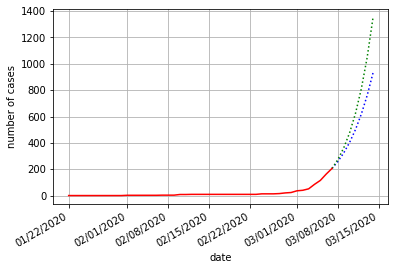

In [4]:
#@title Graph settings { run: "auto", vertical-output: true, form-width: "500px", display-mode: "form" }
import csv
from datetime import datetime
import re
from matplotlib import pyplot
from matplotlib import dates as d
import os
import numpy as np
from math import log, exp
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def get_data():
    path = "COVID-19/csse_covid_19_data/csse_covid_19_daily_reports"
    file_count = 0
    dates = []
    Confirmed = []
    deathList = []
    Recover = []

    for filename in os.listdir(path):
        if filename.endswith(".csv"):
            deaths = 0
            con = 0
            recoveries = 0
            file_count += 1
            country_list = []
            with open(os.path.join(path, filename)) as csv_file:
                try:
                    datepre1 = re.sub('\\.csv', '', filename)
                    datepre2 = re.sub('-', '/', datepre1)
                    date = datetime.strptime(datepre2, '%m/%d/%Y').date()
                except:
                    pass
                csv_reader = csv.reader(csv_file, delimiter=',')
                line_count = 0
                for row in csv_reader:
                    if line_count == 0:
                        line_count += 1
                    else:
                        
                        if row[1] in country_list:
                          pass
                        else:
                          country_list.append(row[1])
                        if (row[1] == location_input) | all:
                            try:
                                deaths += float(row[4])
                                recoveries += float(row[5])
                                con += float(row[3])
                            except:
                                line_count += 1
                                continue
                        line_count += 1
            dates.append(date)
            deathList.append(deaths)
            Confirmed.append(con)
            Recover.append(recoveries)
    print(f'Processed {file_count} days')
    pl = pyplot
    plot(dates, deathList, Confirmed, Recover, pl, file_count)


def plot(x, y, z, g,ax, days):
    ax.xlabel("date")
    ax.gca().xaxis.set_major_formatter(d.DateFormatter('%m/%d/%Y'))
    if DataToDisplay == 'Deaths':
        ax.ylabel("number of deaths")
        new_x, new_y = zip(*sorted(zip(x, y)))
        try:
          prex1, prey1, prex2, prey2 = Predict(new_y, new_x, days)
          ax.plot(prex1, prey1, 'b:', label = 'confirmed')
          ax.plot(prex2, prey2, 'g:', label = 'confirmed')
        except:
          print("\nnot enough Data to predict trend\ntry changing the buffer to a lower number\n")
        ax.plot(new_x, new_y, 'r-', label = 'confirmed')
        if GraphType == 'Log':
            ax.yscale('log')
        else:
            pass
    elif DataToDisplay == 'Confirmed':
        ax.ylabel("number of cases")
        new_x, new_y = zip(*sorted(zip(x, z)))

        prex1, prey1, prex2, prey2 = Predict(new_y, new_x, days)
        ax.plot(prex1, prey1, 'b:', label = 'confirmed')
        ax.plot(prex2, prey2, 'g:', label = 'confirmed')

          
        
        ax.plot(new_x, new_y, 'r-', label = 'confirmed')
        if GraphType == 'Log':
            ax.yscale('log')
        else:
            pass
    elif DataToDisplay == 'Recoveries':
        ax.ylabel("number of deaths")
        new_x, new_y = zip(*sorted(zip(x, g)))
        try:
          prex1, prey1, prex2, prey2 = Predict(new_y, new_x, days)
          ax.plot(prex1, prey1, 'b:', label = 'confirmed')
          ax.plot(prex2, prey2, 'g:', label = 'confirmed')
        except:
          print("\nnot enough Data to predict trend\ntry changing the buffer to a lower number\n")
        ax.plot(new_x, new_y, 'r-', label = 'confirmed')
        if GraphType == 'Log':
            ax.yscale('log')
        else:
            pass
    ax.grid(True)
    ax.gcf().autofmt_xdate()
    pyplot.show()


def Predict( y, x, days):
  numberOfDays = "7" #@param ["1", "2", "3", "4", "5", "6", "7", "365"]
  #buffer = "1" #@param ["1","2","3","4", "5", "6", "7", "8", "9", "10"]
  dateToPredict = "2020-03-28" #@param {type:"date"}
  d1 = datetime.strptime(dateToPredict, "%Y-%m-%d").date()
  deltaY_rangestart = log(y[len(y)-1]/y[len(y)-(2)]) 
  deltaX_rangestart = log(days/(days-1))
  deltaY_rangeend = log(y[len(y)-1]/y[len(y)-(8)]) 
  deltaX_rangeend = log(days/(days-7))
  m1 = deltaY_rangestart/deltaX_rangestart
  m2 = deltaY_rangeend/deltaX_rangeend
  c1 = log(y[len(y)-1])-(m1*log(days))
  c2 = log(y[len(y)-1])-(m2*log(days))
  f1 = lambda a : m1*log(a) + c1
  f2 = lambda a : m2*log(a) + c2
  holder = y[len(y)-1]
  Predict_dataX1 = []
  Predict_dataY1 = []
  Predict_dataX2 = []
  Predict_dataY2 = []
  current_x = x[len(x)-1]
  diff = (d1 - current_x).days+ days
  Predict_dataY1.append(holder)
  Predict_dataY2.append(holder)
  Predict_dataX1.append(current_x)
  Predict_dataX2.append(current_x)
  print("\n::Day::\t\t    ::Number::")
  for l in range(1,int(numberOfDays)+1):
    current_day = days+l
    pre_y1 = exp(f1(current_day))
    pre_y2 = exp(f2(current_day))
    Predict_dataY1.append(pre_y1)
    Predict_dataY2.append(pre_y2)
    c_x = current_x + timedelta(days=l)
    Predict_dataX1.append(c_x)
    Predict_dataX2.append(c_x)
    if int(pre_y1) > int(pre_y2):
      print("\n"+c_x.strftime("%b %d %Y")+"\t\tRange: "+str(int(pre_y2))+" -- "+str(int(pre_y1)))
    else:
      print("\n"+c_x.strftime("%b %d %Y")+"\t\tRange: "+str(int(pre_y1))+" -- "+str(int(pre_y2)))
  if int(exp(f1(diff))) > int(exp(f2(diff))):
    print("\n\nnumber on chosen date between: ", int(exp(f2(diff))),"and", int(exp(f1(diff))))
  else:
    print("\n\nnumber on chosen date between: ", int(exp(f1(diff))),"and", int(exp(f2(diff))))

  print("\n\n")
  return Predict_dataX1, Predict_dataY1, Predict_dataX2, Predict_dataY2


Scope = 'Country' #@param ["World", "Country"]
DataToDisplay = 'Confirmed' #@param ["Deaths", "Confirmed", "Recoveries"]
GraphType = 'Linear' #@param ["Log", "Linear"]
if Scope == 'World':
    all = True
    location_input = "none"
else:
    all = False
    location_input = "UK" #@param ["UK", "Italy", "Iran", "Mainland China", "Taiwan", "Hong Kong", "Macau", "US", "Japan", "Thailand", "South Korea", "Singapore", "Vietnam", "France", "Nepal", "Malaysia", "Canada", "Cambodia", "Sri Lanka", "Australia", "Germany"]
get_data()





